In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import spacy

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
data=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')
gender=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data['surname']=data['Name'].apply(lambda x: x.split(' ')[1])
count=data['surname'].value_counts()
surn = count[count < 10].index
data['surname'] = data['surname'].apply(lambda x: 'others' if x in surn else x)
# m = data[data['surname'].isin(count.index[count >= 10])]
# data=m
data['surname'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'others'], dtype=object)

In [5]:
test['surname']=test['Name'].apply(lambda x: x.split(' ')[1])
test['surname'].value_counts()
count=test['surname'].value_counts()
surn = count[count < 10].index
test['surname'] = test['surname'].apply(lambda x: 'others' if x in surn else x)
test['surname'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'others', 'Master.'], dtype=object)

In [6]:
data.head()
data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr.
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs.


In [8]:
data['Age'] = data['Age'].fillna(data['Age'].mode()[0])
data.isnull().sum()
test['Age'] = test['Age'].fillna(test['Age'].mode()[0])
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
surname          0
dtype: int64

In [9]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [10]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<BarContainer object of 2 artists>

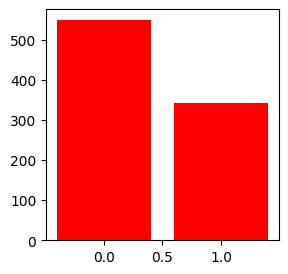

In [11]:
plt.figure(figsize=(3,3))
plt.bar(list(data['Survived'].value_counts().keys()),list(data['Survived'].value_counts()),color='r')

In [12]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

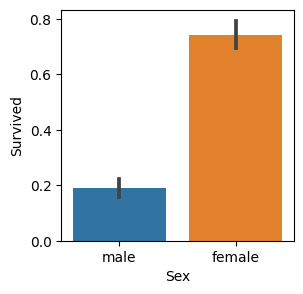

In [13]:
plt.figure(figsize=(3,3))
sns.barplot(x=data.Sex, y=data.Survived)


<Axes: xlabel='Pclass', ylabel='Survived'>

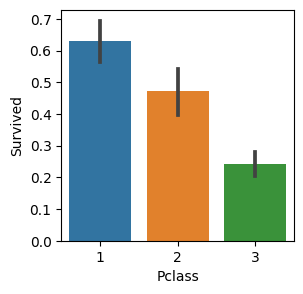

In [14]:
plt.figure(figsize=(3,3))

sns.barplot(x=data.Pclass, y=data.Survived)


In [15]:
sum(data['Pclass'].isnull())

0

In [16]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
surname          0
dtype: int64

In [17]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [18]:
from xgboost import XGBClassifier 
f=["Pclass","Sex","surname"]
y= data["Survived"]
x = pd.get_dummies(data[f])
x['Age']=data['Age']
x['SibSp']=data['SibSp'].astype(int)
#X_train, X_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = 42)
test_x=pd.get_dummies(test[f])
test_x['Age']=test['Age']
test_x['SibSp']=test['SibSp'].astype(int)
# model = XGBClassifier (n_estimators=50, learning_rate=0.05, n_jobs=4)
# model.fit(X_train,y_train )
# predictions = model.predict(X_val)




In [19]:
x['sur']=data['Survived']
x.corr()

,Pclass,Sex_female,Sex_male,surname_Master.,surname_Miss.,surname_Mr.,surname_Mrs.,surname_others,Age,SibSp,sur
Pclass,1.000000,-0.131900,0.131900,0.082081,-0.004180,0.130159,-0.154262,-0.118563,-0.356187,0.083081,-0.338481
Sex_female,-0.131900,1.000000,-1.000000,-0.159934,0.679688,-0.838019,0.537366,-0.033681,-0.073377,0.114631,0.543351
Sex_male,0.131900,-1.000000,1.000000,0.159934,-0.679688,0.838019,-0.537366,0.033681,0.073377,-0.114631,-0.543351
surname_Master.,0.082081,-0.159934,0.159934,1.000000,-0.108706,-0.246287,-0.085943,-0.052301,-0.362378,0.349559,0.085221
surname_Miss.,-0.004180,0.679688,-0.679688,-0.108706,1.000000,-0.569592,-0.198762,-0.120956,-0.238978,0.084842,0.329999
surname_Mr.,0.130159,-0.838019,0.838019,-0.246287,-0.569592,1.000000,-0.450323,-0.274043,0.160795,-0.243413,-0.529008
surname_Mrs.,-0.154262,0.537366,-0.537366,-0.085943,-0.198762,-0.450323,1.000000,-0.095629,0.177413,0.058607,0.340572
surname_others,-0.118563,-0.033681,0.033681,-0.052301,-0.120956,-0.274043,-0.095629,1.000000,0.132751,-0.025137,-0.018304
Age,-0.356187,-0.073377,0.073377,-0.362378,-0.238978,0.160795,0.177413,0.132751,1.000000,-0.232411,-0.052872
SibSp,0.083081,0.114631,-0.114631,0.349559,0.084842,-0.243413,0.058607,-0.025137,-0.232411,1.000000,-0.035322


In [20]:
x['Parch']=data['Parch']
test_x['Parch']=data['Parch']
x.pop('sur')

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: sur, Length: 891, dtype: int64

In [21]:
x.head()
test_x.head()


,Pclass,Sex_female,Sex_male,surname_Master.,surname_Miss.,surname_Mr.,surname_Mrs.,surname_others,Age,SibSp,Parch
0,3,False,True,False,False,True,False,False,34.5,0,0
1,3,True,False,False,False,False,True,False,47.0,1,0
2,2,False,True,False,False,True,False,False,62.0,0,0
3,3,False,True,False,False,True,False,False,27.0,0,0
4,3,True,False,False,False,False,True,False,22.0,1,0


In [22]:
model_1 = XGBClassifier (n_estimators=50, learning_rate=0.05, n_jobs=4)
model_1.fit(x,y)
predictions_1 = model_1.predict(test_x)
test_x.shape

(418, 11)

In [23]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions_1})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
